In [35]:
!jupyter trust WriteUp.ipynb

Signing notebook: WriteUp.ipynb


## <u> DATA 110 Final Project Write Up </u>
## Group Members: Dan Shallal, Daniel Wang, Devarshi Dave, & Michael Gaines
## Dataset: Track B Dataset: Child Mortality of 0-5 Year Olds per 1000 born

<u> Defining the problem- </u>

After choosing the track B, we <i> initially </i> reasoned that the data set could answer a vaguer question in “How do child mortality rates fluctuate between various countries and over time?”. We chose this dataset from track B because we were interested in understanding how child mortality rates differ between different countries and whether there are underlying factors that accurately predict how child mortality rates differ between countries. Disease, lack of nutrition, limited healthcare, and other internal and external issues that have plagued how children grow physically. We sincerely believe that our project can investigate the current situation of each region of the world, in terms of whether their child mortality rates have changed, in what ways the rates have changed, and how each region compares to others in order to recognize potential inequalities that need to be addressed. After our first data visualization created during the project proposal and the feedback given to our group afterwards, we decided to make our question more specific, changing it to "Can the previous child mortality rates of a country be used to accurately predict its future child mortality rates?" Our hypothesis is that prior mortality rates of a country can be used to accurately predict mortality data for the future.

In [36]:
# Import Python pandas
import pandas as pd
# Load the csv into a pandas dataframe
dataset = pd.read_csv("child_mortality.csv")
# Read out all the countries within the dataset
all_countries = dataset["country"].tolist()
print(all_countries)
# Number of samples and key features
print(len(dataset), len(dataset.columns))

['Afghanistan', 'Angola', 'Albania', 'Andorra', 'UAE', 'Argentina', 'Armenia', 'Antigua and Barbuda', 'Australia', 'Austria', 'Azerbaijan', 'Burundi', 'Belgium', 'Benin', 'Burkina Faso', 'Bangladesh', 'Bulgaria', 'Bahrain', 'Bahamas', 'Bosnia and Herzegovina', 'Belarus', 'Belize', 'Bolivia', 'Brazil', 'Barbados', 'Brunei', 'Bhutan', 'Botswana', 'Central African Republic', 'Canada', 'Switzerland', 'Chile', 'China', "Cote d'Ivoire", 'Cameroon', 'Congo, Dem. Rep.', 'Congo, Rep.', 'Colombia', 'Comoros', 'Cape Verde', 'Costa Rica', 'Cuba', 'Cyprus', 'Czech Republic', 'Germany', 'Djibouti', 'Dominica', 'Denmark', 'Dominican Republic', 'Algeria', 'Ecuador', 'Egypt', 'Eritrea', 'Spain', 'Estonia', 'Ethiopia', 'Finland', 'Fiji', 'France', 'Micronesia, Fed. Sts.', 'Gabon', 'UK', 'Georgia', 'Ghana', 'Guinea', 'Gambia', 'Guinea-Bissau', 'Equatorial Guinea', 'Greece', 'Grenada', 'Guatemala', 'Guyana', 'Hong Kong, China', 'Honduras', 'Holy See', 'Croatia', 'Haiti', 'Hungary', 'Indonesia', 'India', '

<u> Data Collection- </u>

Our dataset comes from Gapminder, a non-profit organization that aims to aid global sustainability by providing statistics and data on different parts of the world over hundreds of years. Gapminder compiled the dataset from multiple sources they deemed to be accurate and useful. Three independent sources were used for the dataset, including one from UNIGME (a collaboration by UNICEF, WHO, UN Population, and the World Bank). The first source uses data from mortality.org, a leading database on human mortality over centuries, and a series of books on historical statistics. The second and third are from world organizations like the UN, who provide estimates from ~1950 on how child mortality in all parts of the world has changed. The UN provides prospect estimates about future child mortality rates from their own reasearch. Gapminder then combined the data sets by filling in blanks in terms of years that datasets had with the others, and by taking weighted averages of the overlap that were similar. The population of the dataset is people from around 1800 to 2100, but this highlights a potential limitation in what we can conclude from this dataset in that because it also looks to predict data in the future, it may be that the data previous to that is not 100% accurate and is also filling in gaps like it does for the future. In addition, though Gapminder compiles to their best ability, the combining of data may still cause some bias/inaccuracy to occur as the sources are different which possibly causes what we’ve noticed about empty rows for different countries. In addition, combining different sources may cause bias in that different sources include or disclude certain variables that may skew the final dataset. In fact, different countries did not exist in terms of history, where some countries were technically part of another, which makes characterizing child mortality changes for some countries possibly inaccurate as borders changed. Within the dataset are 197 samples, being all countries in the world, and there are 302 key features, all being years that start from 1800 to 2100 and the country name.

In [37]:
def preparer(df):
    # Clean dataset by having any rows with empty columns removed and reset indexing
    cleaned_dataset = df.dropna().reset_index(drop=True)
    # Change death amount to percentage
    for column in cleaned_dataset.columns:
        # Skip country column
        if column != "country":
            cleaned_dataset[column] /= 1000
    return cleaned_dataset
# Cleaned dataset
final_dataset = preparer(dataset)
# Function to create time periods
def time_categorizer(cleaned_dataset):
    cleaned_dataset["1800-1850"] = cleaned_dataset.iloc[:, 1:51].mean(axis=1)
    cleaned_dataset["1851-1900"] = cleaned_dataset.iloc[:, 51:100].mean(axis=1)
    cleaned_dataset["1901-1950"] = cleaned_dataset.iloc[:, 101:150].mean(axis=1)
    cleaned_dataset["1951-2020"] = cleaned_dataset.iloc[:, 151:222].mean(axis=1)
    cleaned_dataset["2021-2100"] = cleaned_dataset.iloc[:, 223:302].mean(axis=1)
    cleaned_dataset = cleaned_dataset.filter(items=["country", "1800-1850", "1851-1900", "1901-1950", "1951-2020", "2021-2100"])
    return cleaned_dataset
final_dataset = time_categorizer(final_dataset)
final_dataset

C:\Users\dzw\AppData\Local\Temp\ipykernel_12016\827278542.py:14: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  cleaned_dataset["1800-1850"] = cleaned_dataset.iloc[:, 1:51].mean(axis=1)
C:\Users\dzw\AppData\Local\Temp\ipykernel_12016\827278542.py:15: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  cleaned_dataset["1851-1900"] = cleaned_dataset.iloc[:, 51:100].mean(axis=1)
C:\Users\dzw\AppData\Local\Temp\ipykernel_12016\827278542.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame

,country,1800-1850,1851-1900,1901-1950,1951-2020,2021-2100
0,Afghanistan,0.47200,0.479245,0.458143,0.219621,0.024347
1,Angola,0.48600,0.485959,0.445245,0.223870,0.032282
2,Albania,0.37500,0.375000,0.345612,0.087755,0.003989
3,UAE,0.43400,0.434000,0.409327,0.072770,0.003632
4,Argentina,0.40200,0.400714,0.193800,0.042155,0.004648
...,...,...,...,...,...,...
180,Samoa,0.39982,0.284122,0.201163,0.063711,0.006681
181,Yemen,0.54000,0.540000,0.505020,0.211394,0.026604
182,South Africa,0.39800,0.398000,0.357694,0.108531,0.016917
183,Zambia,0.41000,0.409980,0.380531,0.158418,0.023481


<u> Data Preparation </u>

When we analyzed the data set, we realized that some rows (countries) were left completely blank by Gapminder. For data modeling and analysis later, we cleaned the data set to only have full rows, which removes a few countries.  To also make the data much more efficient for model creation, we decided to create 5 time periods instead of 300 years with averages of the years within the time period for each country. These time periods are 1800-1850, 1851-1900, 1901-1950, 1951-2020, and 2021-2100; The fourth time period ends at 2020 which we believed to be a good stopping point to the "present", and the fifth goes until 2100 which we would consider the future. We will also have each row's mortality rates as a proportion (death count / 1000) to make the mortality rate simpler for creating visualizations and models.

We created preparer() and time_categorizer() functions to take in a dataframe, in this case being our child_mortality.csv, and have both of them do all of the data preparation previously described. More specifically, the preparer() function creates the child mortality rates to proportions, and time_categorizer() function takes the mean child mortality rates of the time periods for each country and creates new columns for the time periods. Afterwards, all other columns are filtered out so to just have the time periods.

<u> Data Exploration </u>

First Data Visualization (Boxplot)

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt

SUMMARY STATISTICS FOR EACH TIME PERIOD CHRONOLOGICALLY
Means: 0.41667037837837834 0.39820148924434645 0.323458444567016 0.0977259878188047
Medians: 0.41700000000000026 0.4139591836734695 0.36144897959183675 0.0799605633802817
Ranges: 0.27091999999999944 0.44141836734693873 0.4396693877551021 0.2677932394366198
Standard Deviations: 0.04948426271979069 0.07574255276136799 0.10517585660107932 0.06926981905569905
IQRs: 0.06410000000000021 0.07897959183673459 0.16710204081632654 0.1108181690140846


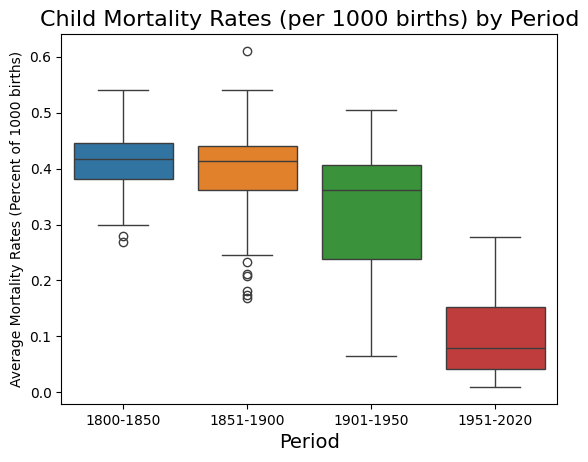

In [39]:
time_periods = final_dataset.drop(columns=["2021-2100"])
sns.boxplot(data=time_periods)
plt.title("Child Mortality Rates (per 1000 births) by Period", fontsize=16)
plt.xlabel("Period", fontsize=14)
plt.ylabel("Average Mortality Rates (Percent of 1000 births)", fontsize=10)
# Summary Statistics
print("SUMMARY STATISTICS FOR EACH TIME PERIOD CHRONOLOGICALLY")
def summary_statistics(time_periods):
    mean1 = time_periods["1800-1850"].mean()
    mean2 = time_periods["1851-1900"].mean()
    mean3 = time_periods["1901-1950"].mean()
    mean4 = time_periods["1951-2020"].mean()
    print("Means:", mean1, mean2, mean3, mean4)
    median1 = time_periods["1800-1850"].median()
    median2 = time_periods["1851-1900"].median()
    median3 = time_periods["1901-1950"].median()
    median4 = time_periods["1951-2020"].median()
    print("Medians:", median1, median2, median3, median4)
    range1 = time_periods["1800-1850"].max() - time_periods["1800-1850"].min()
    range2 = time_periods["1851-1900"].max() - time_periods["1851-1900"].min()
    range3 = time_periods["1901-1950"].max() - time_periods["1901-1950"].min()
    range4 = time_periods["1951-2020"].max() - time_periods["1951-2020"].min()
    print("Ranges:", range1, range2, range3, range4)
    std1 = time_periods["1800-1850"].std()
    std2 = time_periods["1851-1900"].std()
    std3 = time_periods["1901-1950"].std()
    std4 = time_periods["1951-2020"].std()
    print("Standard Deviations:", std1, std2, std3, std4)
    IQR1 = time_periods["1800-1850"].quantile(0.75) - time_periods["1800-1850"].quantile(0.25)
    IQR2 = time_periods["1851-1900"].quantile(0.75) - time_periods["1851-1900"].quantile(0.25)
    IQR3 = time_periods["1901-1950"].quantile(0.75) - time_periods["1901-1950"].quantile(0.25)
    IQR4 = time_periods["1951-2020"].quantile(0.75) - time_periods["1951-2020"].quantile(0.25)
    print("IQRs:", IQR1, IQR2, IQR3, IQR4)
summary_statistics(time_periods)

As part of exploring the data to understand trends, distribution, and correlations, we first created a boxplot to see how mortality rates were distributed across all the countries over four different time periods (from 1800 to the present). We took the mean of each country over each period, and created four columns for each period. By taking the different central and dispersion measures of each period, we can explore how child mortality across countries generally over time. Right away, we noticed that the median and mean average mortality rates decreased as time periods reached closer to the present. Also, there was a major downspike in child mortality for most of the world post 1950 (as medicine and sanitation advanced globally). In addition, the mean and medians are pretty similar, especially from 1800-1850, where the boxplot appears to show a perfectly symmetrical data disribution. For the more recent time periods, the distribution becomes more skewed, like from 1901-1950, where there are more countries whose average child mortality rates fall below the median, as evidenced by the longer distance between Q1 and the median. In prior time periods, the means and medians were nearly equal, however, in 1901-1950, although the median mortality rate stayed consistent with previous time periods, the overall spread of child mortality rates for the time period became more right-skewed, indicating that there is more variance on the right half. This prompts us to think that many countries started doing better in terms of child mortality ratees while others had little change. We believe that this is due to the fact that some regions in the world are more developed in terms of sanitation, healthcare, and other developmental aspects. In general, there appears to be a negative correlation between time period and child mortaltiy rates, which suggested that there may be a strong linear association, indicating that a multiple linear regression model may be a great predictive model to use. 

<u> **Model Building** </u>

The question we are investigating is if we can use previous child mortality data to accurately predict future child mortality rates. We have chosen to create a multiple linear regression model because multiple linear regression models are very good at handling continuous numerical data along with multiple variables. From our data exploration, there appears to be a linear relationship between time period and child mortality. When exploring the data, time period seemed to negatively correlate with child mortality, and it appeared that as time increased, the data became more and more skewed, indicating that there is inequality that could also be taken into account in the model. Also, child mortality is a numerical, continuous variable which is well-aligned for a linear regression model. A linear regression model works by taking one or more predictor variables to create a linear equation that utilizes the predictor variables to predict a target variable. In our model, we will be using the time period child mortality columns (four total predictor variables), and child mortality rate for the future (one target variable). Using Python's sklearn module, we can import an empty linear regression model that can be used to fit our predictor and target variables. The code below will have documentation for the process (sampling, filtering, and fitting).

In [40]:
# Import linear regression model from sklearn
from sklearn.linear_model import LinearRegression
# sampler() function to take samples for train and test data for predictor and target variables
def sampler(df):
    train = df.sample(frac=0.8)
    test = df.drop(index=train.index)
    # Filter predictor and target variables from train and test
    X_train = train.drop(columns=["2021-2100", "country"])
    y_train = train.filter(items=["2021-2100"])
    X_test = test.drop(columns=["2021-2100", "country"])
    y_test = test.filter(items=["2021-2100"])
    return [X_train, y_train, X_test, y_test]
X_y_test_train = sampler(final_dataset)

In [ ]:
# model_creator() function to create the linear model with data
def model_creator(X_train, y_train, X_test, y_test):
    # Create an empty linear regression model
    lr = LinearRegression(fit_intercept=False)
    # Fit the data
    lr.fit(X_train, y_train)
    # Return the R^2 by using the test data and the actual model
    return lr.score(X_test, y_test), lr

print(model_creator(X_y_test_train[0], X_y_test_train[1], X_y_test_train[2], X_y_test_train[3])[0])

0.8571252492950078


Our hypothesis indicated that there is a strong correlation between previous mortality rates and future mortality rate of a country. In order to evaluate a linear regression model, the <i> coefficient of determination </i>, or R^2, describes the measurement of fit that the linear equation has with the data sampled. This coefficient varies from 0 to 1 inclusive, and the closer it is to 1, the more perfectly the linear equation describes the data. In order to test the fit of the model, we use the test data (20% sampled that was not used for the model) to test the accuracy of the model. More often than not, the coefficient of determination is > 0.6, indicating statistical significance. However, it is important to realize that the model's accuracy may be lower than it should be due to the nature of the data. The child mortality rates under the time periods are extremely specific (ex. 0.423 vs. 0.425) which means that while not extremely precise, the model can give a mostly accurate prediction of future child mortality rates.

<u> Below is a boxplot visualization of 100 random samples of the data taken in which the model is built and its coefficient of determination is taken. </u>

Total above 0.6: 75.0


Text(0, 0.5, 'Coefficient of Determination')

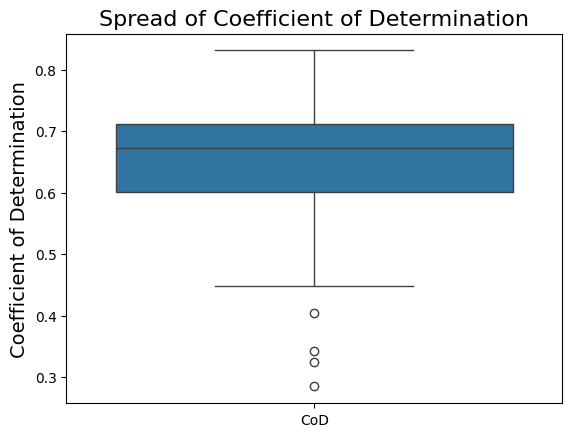

In [43]:
# Create a dataframe of coefficients of determination
coef_df = {"CoD" : []}
for _ in range(100):
    train_test_data = sampler(final_dataset)
    coef_df["CoD"].append(model_creator(train_test_data[0], train_test_data[1], train_test_data[2], train_test_data[3])[0])

# Find proportion above 0.6
above_6 = 0
for cod in coef_df["CoD"]:
    if cod > 0.6:
        above_6 += 1
print("Total above 0.6:", above_6 / len(coef_df))
sns.boxplot(data=coef_df)
plt.title("Spread of Coefficient of Determination", fontsize=16)
plt.ylabel("Coefficient of Determination", fontsize=14)

The model's coefficient of determination created using the predictor variables more often than not is > 0.6, with about 75/100 of the runs being between 0.6 and 0.85 as the coefficient of determination. We can use this to evaluate that the model is statistically significant in showing trends of future mortality rates of a country about ~75% of the time. There are outliers, where we see around 4 times where the model is underfitting, or shows little correlation to the test data.

<u> Below is a histogram, providing a more direct visualization of what the scores are and the distribution </u>

([<matplotlib.axis.XTick at 0x154e9e59cd0>,
 [Text(0.0, 0, '0.0'),
  Text(0.1, 0, '0.1'),
  Text(0.2, 0, '0.2'),
  Text(0.3, 0, '0.3'),
  Text(0.4, 0, '0.4'),
  Text(0.5, 0, '0.5'),
  Text(0.6, 0, '0.6'),
  Text(0.7, 0, '0.7'),
  Text(0.8, 0, '0.8')])

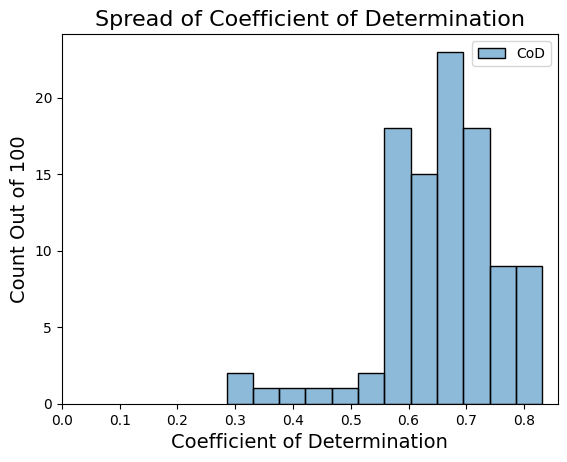

In [44]:
sns.histplot(data=coef_df)
plt.title("Spread of Coefficient of Determination", fontsize=16)
plt.ylabel("Count Out of 100", fontsize=14)
plt.xlabel("Coefficient of Determination", fontsize=14)
plt.xticks(ticks=[0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8])

Data matches well with the boxplot, as there are coefficient of determination scores concentrate mostly on the right side around 0.6-0.85. There are outliers that go near 0.3, showing that the model can be inaccurate and have little correlation. 

In order to get an even better understanding of how strong our linear regression model we can run not just 100 simulations, but actually 500 which we can plot the spread of once more.

([<matplotlib.axis.XTick at 0x154e9e8ddf0>,
 [Text(0.0, 0, '0.0'),
  Text(0.1, 0, '0.1'),
  Text(0.2, 0, '0.2'),
  Text(0.3, 0, '0.3'),
  Text(0.4, 0, '0.4'),
  Text(0.5, 0, '0.5'),
  Text(0.6, 0, '0.6'),
  Text(0.7, 0, '0.7'),
  Text(0.8, 0, '0.8')])

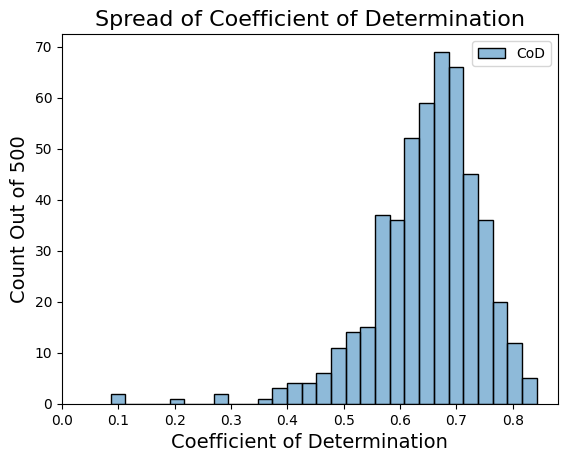

In [46]:
# Create a dataframe of coefficients of determination
coef_df2 = {"CoD" : []}
for _ in range(500):
    train_test_data = sampler(final_dataset)
    coef_df2["CoD"].append(model_creator(train_test_data[0], train_test_data[1], train_test_data[2], train_test_data[3])[0])
sns.histplot(data=coef_df2)
plt.title("Spread of Coefficient of Determination", fontsize=16)
plt.ylabel("Count Out of 500", fontsize=14)
plt.xlabel("Coefficient of Determination", fontsize=14)
plt.xticks(ticks=[0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8])

The distribution is left-skewed just like for the 100 simulations, and it appears that the distributions are extremely similar. It is important to notice that there are outliers again, and we theorize that this may be due to outlier countries that were viewed in the boxplot of the data exploration section of this write-up. These outliers would cause test data that trained the linear regression model to fail for these outlier countries as tests.

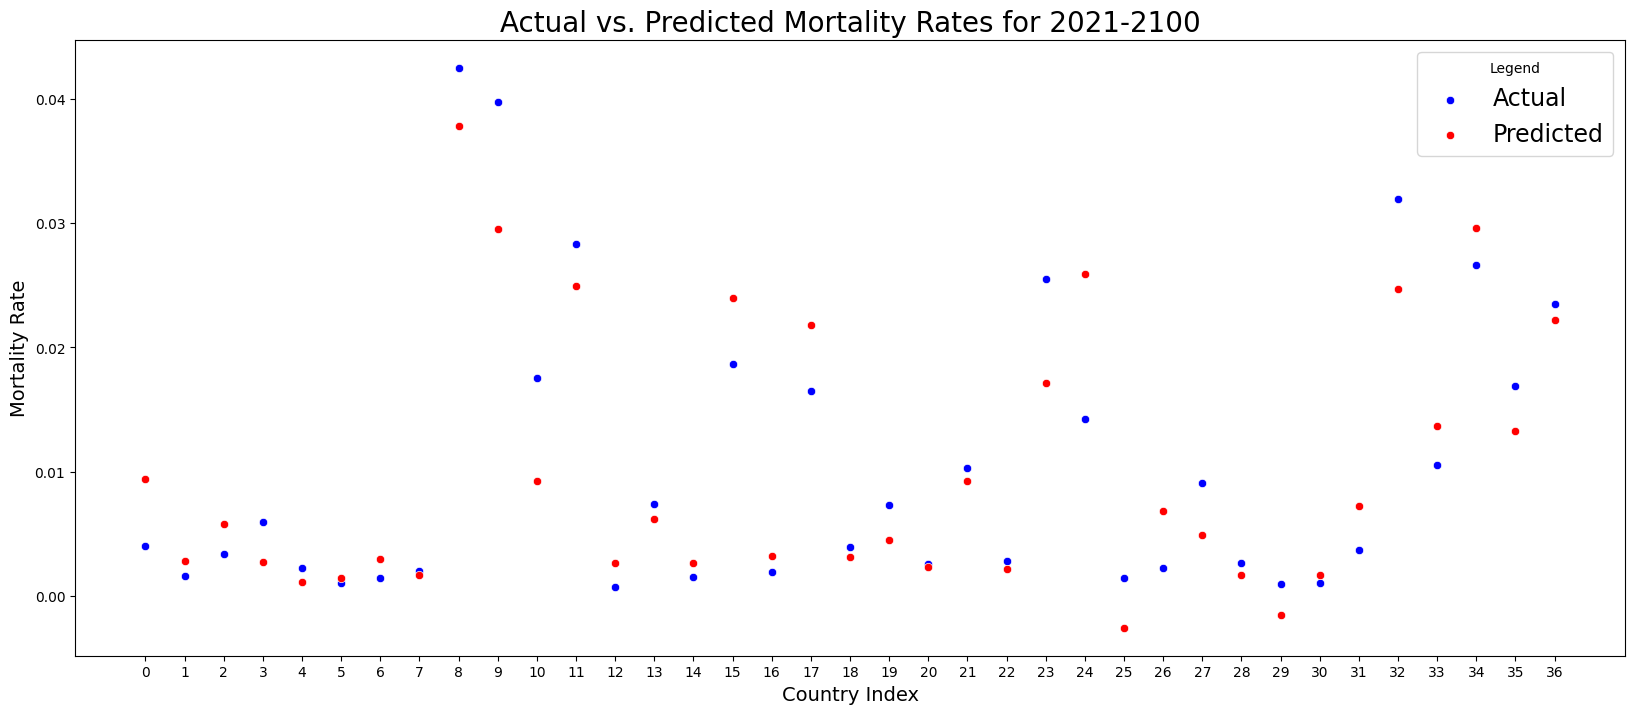

In [67]:
# Creates plot
fig, ax = plt.subplots(1, figsize=(20, 8))


# Gets the actual data from the test set and plots it on a scatterplot
actual = X_y_test_train[3].reset_index()
actual = actual.drop(columns=["index"])
actual.rename(columns={'2021-2100': 'Actual'}, inplace=True)
sns.scatterplot(data = actual, x = range(len(actual)), y="Actual", color = "blue", label = "Actual")

# Creates a dataframe that contains the data from the linear regression model and plots it on a scatterplot
predicted = model_creator(X_y_test_train[0], X_y_test_train[1], X_y_test_train[2], X_y_test_train[3])[1].predict(X_y_test_train[2])
predictedDF = pd.DataFrame(predicted, columns=["Predicted"])
sns.scatterplot(data = predictedDF, x = range(len(predictedDF)), y="Predicted", color = "red", label = "Predicted")

# Add legend, labels, and title to plot
plt.legend(title="Legend", loc="upper right", prop={'size': 17})
plt.xlabel("Country Index", fontsize = 14)
plt.ylabel("Mortality Rate", fontsize = 14)
plt.title("Actual vs. Predicted Mortality Rates for 2021-2100", fontsize = 20)

# Set x ticks
ax.set_xticks(range(len(predicted))) 
  
# Show plot
plt.show()

The above scatter plot compares the model's predictions on a country's mortality rate within the "future" time period with the actual data from Gapminder on those countries' mortality rates. As seen in the graph, although the model is not perfectly accurate, for most of the points, the predicted mortality rate is very close to the actual mortality rate.

<u> **Evaluation Conclusion** </u>

Our hypothesis was decently proven, but <i> not </i> strongly proven, as our model would consistently average scores of 0.6-0.85 (R squared) but would have outlier scores that show little correlation and designate our model as weak.

<u> **Model Deployment** </u>

We believe sincerely that there is a lot of potential with this model, and that it can be further enhanced. Whether it be with data preparation, and/or adding extra predictor variables, this model can be improved upon or even used in its current state. For example, many countries ended up being outright removed from the dataset due to empty rows, and the time periods did not have equal sizes, which could have skewed the values. A model like this can be used to predict future child mortality rates with a sufficient confidence for discussing global issues like child mortality rates. For example, in the future, if child mortality rates need to be predicted, our model can be used to gain some insight into what these rates will look like, hopefully sparking needed discourse on how to mitigate developmental inequality and reduce future trends. Nevertheless, our model still isn't the best, and it has been shown to be inaccurate at times which may bring challenges. 